In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Order of Operations 
- Read csv(s)
- Removing unnessary headers from dataframe of WDI Data (df)
- Filter the dataframe (df) for relevant country names 
- Filer the dataframe (df) for relevant indicators

In [2]:
#to read csv of data
df= pd.read_csv('WDIData.csv')

#to read csv of country names
df_country_names= pd.read_csv('WDI_Country_Code_and_Names.csv',encoding = "ISO-8859-1")

#to read csv of indicators
df_list_indicators = pd.read_csv('WDI_list_of_reviewed_indicators.csv')

### <font color = red> Dataframe Cleanup </font>

#### Removing Columns

In [3]:
#to grab the headers of the dataset
df_headers=list(df.columns.values)

In [4]:
# to count the number of headers
len(df_headers)

63

In [5]:
#only pull the headers that are years
df_years = df_headers[-59:]

In [6]:
#only select previous years before 2010
df_years_drop = df_years[0:50]
#to make column '2018' a list
df_years_drop_2018 = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop = df_years_drop + df_years_drop_2018

In [7]:
#to drop the years and create a summarized df
df_columns_removed = df.drop(df_drop,axis=1)
df_columns_removed.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,82.407647,82.827636,83.169227,83.587141,83.954293,84.230630,84.570425,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,86.136134,86.782683,87.288244,88.389705,88.076774,88.517967,88.768654,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,74.543489,75.770972,76.772916,78.839139,77.487377,78.564439,78.958780,NaN


#### Filter by Country Names

In [8]:
#to preview df_country_names
df_country_names.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code
0,ABW,Aruba,Aruba,Aruba,AW
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF
2,AGO,Angola,Angola,People's Republic of Angola,AO
3,ALB,Albania,Albania,Republic of Albania,AL
4,AND,Andorra,Andorra,Principality of Andorra,AD


In [9]:
#make a list of country short name
country_short_names = list(df_country_names['Short Name'])

In [10]:
#filter df by short names list
df_filter_cols_nd_cols_rem = df_columns_removed.loc[df_columns_removed['Country Name'].isin(country_short_names)]

In [11]:
#source[filterdfbyalist]: https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

In [12]:
df_filter_cols_nd_cols_rem.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
75153,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75154,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75155,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,20.68,22.330000,24.08,26.170000,27.99,30.1,32.440000,NaN
75156,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,42.70,43.222019,69.10,67.259552,89.50,71.5,84.137138,NaN
75157,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,32.40,33.380110,63.80,58.423667,87.80,64.2,78.961074,NaN


#### Filter Data by Indicators

In [13]:
df_list_indicators.head()

,Indicator Name
0,Adjusted net national income (constant 2010 US$)
1,Adjusted net national income per capita (annua...
2,Adjusted net national income per capita (const...
3,Agricultural methane emissions (thousand metri...
4,Agricultural nitrous oxide emissions (thousand...


#### Per the word doc: 'World_Dev_Indicators_Reviewed_Subjects.docx'

Required & Optional indicators for chart preference:

- PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
- GDP (constant 2010 US$)
- GDP growth (annual %)
- Population, total
- Population growth (annual %)

In [14]:
req_nd_opti_indicators = df_list_indicators.loc[df_list_indicators['Indicator Name'].isin([
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
    'GDP (constant 2010 US$)',
    'GDP growth (annual %)',
    'Population, total',
    'Population growth (annual %)'
])]

req_nd_opti_indicators

,Indicator Name
11,GDP (constant 2010 US$)
12,GDP growth (annual %)
16,"PM2.5 air pollution, mean annual exposure (mic..."
18,Population growth (annual %)
19,"Population, total"


In [15]:
#to make a list of indicators for filter
list_indicators = list(req_nd_opti_indicators['Indicator Name'])
list_indicators 

['GDP (constant 2010 US$)',
 'GDP growth (annual %)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'Population growth (annual %)',
 'Population, total']

In [16]:
#filter by indicators
df_countries_indiciator = df_filter_cols_nd_cols_rem.loc[df_filter_cols_nd_cols_rem['Indicator Name'].isin(list_indicators )]
df_countries_indiciator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017
75666,Afghanistan,AFG,GDP (constant 2010 US$),NY.GDP.MKTP.KD,1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10
75672,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.436244e+01,4.263548e-01,1.275229e+01,5.600745e+00,2.724543e+00,1.451315e+00,2.260314e+00,2.665292e+00
76213,Afghanistan,AFG,"PM2.5 air pollution, mean annual exposure (mic...",EN.ATM.PM25.MC.M3,6.524559e+01,6.683573e+01,6.602317e+01,6.136674e+01,5.901033e+01,6.125266e+01,5.628705e+01,5.691081e+01
76285,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.812617e+00,3.095119e+00,3.272703e+00,3.315224e+00,3.183201e+00,2.943234e+00,2.689163e+00,2.490790e+00
76296,Afghanistan,AFG,"Population, total",SP.POP.TOTL,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07


#### <font color = purple> Final Dataframe Edit </font>

In [17]:
#remove unnessecary columns
df_final = df_countries_indiciator.drop(['Country Code','Indicator Code'],axis=1)
df_final.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
75666,Afghanistan,GDP (constant 2010 US$),1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10
75672,Afghanistan,GDP growth (annual %),1.436244e+01,4.263548e-01,1.275229e+01,5.600745e+00,2.724543e+00,1.451315e+00,2.260314e+00,2.665292e+00
76213,Afghanistan,"PM2.5 air pollution, mean annual exposure (mic...",6.524559e+01,6.683573e+01,6.602317e+01,6.136674e+01,5.901033e+01,6.125266e+01,5.628705e+01,5.691081e+01
76285,Afghanistan,Population growth (annual %),2.812617e+00,3.095119e+00,3.272703e+00,3.315224e+00,3.183201e+00,2.943234e+00,2.689163e+00,2.490790e+00
76296,Afghanistan,"Population, total",2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07,3.465603e+07,3.553008e+07


### <font  color = blue >Dataframe for Air Pollution </font>

In [18]:
#filter df by air pollution
air_pollu_df = df_final.loc[df_final["Indicator Name"]== 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].round(2)
air_pollu_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
76213,Afghanistan,"PM2.5 air pollution, mean annual exposure (mic...",65.25,66.84,66.02,61.37,59.01,61.25,56.29,56.91
77812,Albania,"PM2.5 air pollution, mean annual exposure (mic...",21.28,22.77,20.58,19.94,18.88,19.51,18.19,18.20
79411,Algeria,"PM2.5 air pollution, mean annual exposure (mic...",33.64,33.83,33.37,34.25,35.56,36.09,39.85,38.88
81010,American Samoa,"PM2.5 air pollution, mean annual exposure (mic...",15.07,15.39,14.34,14.13,13.32,13.02,12.38,12.47
82609,Andorra,"PM2.5 air pollution, mean annual exposure (mic...",12.81,13.27,12.41,11.81,10.83,11.46,10.26,10.31


#### <font color = red> Reviewing Air Pollution data for 2009 </font>
I'm not including 2009 in the other data sets, becuase they have % annual growth. Meanwhile, air pollution doesn't have % growth. 

By adding 2009's data we can calculate % growth for 2010 in order to have complete data from 2010 - 2018.

In [19]:
#to get the column for 2009
#only select previous years before 2010
df_years_drop_air = df_years[0:49]
#to make column '2018' a list
df_years_drop_2018_air = list([df_years[-1]])

# to combine lists of years into 1 drop line
df_drop_air = df_years_drop_air + df_years_drop_2018_air 

In [20]:
#to drop the years and create a summarized df
df_columns_removed_air = df.drop(df_drop_air,axis=1)

#to remove extra columns, and to filter the data by country:
df_air = df_columns_removed_air.drop(['Country Code','Indicator Code'],axis=1).loc[df_columns_removed_air['Country Name'].isin(country_short_names)].loc[df_columns_removed_air['Indicator Name']== 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'].set_index('Country Name').reset_index() 
df_air.head(3)

,Country Name,Indicator Name,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,"PM2.5 air pollution, mean annual exposure (mic...",NaN,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Albania,"PM2.5 air pollution, mean annual exposure (mic...",NaN,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
2,Algeria,"PM2.5 air pollution, mean annual exposure (mic...",NaN,33.635820,33.834048,33.366826,34.245328,35.563917,36.089164,39.853274,38.884011


#### <font color=red> Conclusion of 2009 Air Pollution Data </font>

From the table above, we can see there is no data in 2009 for PM2.5 thus, when completing your charts use the years 2011 - 2017. 

Since we do not need air data for 2009 I'll discontinue dataframe "df_air" and use going forward "air_pollu_df".

In [21]:
#create a df for percent change of air pollution

air_pollu_df_1 = air_pollu_df.drop('Indicator Name', axis = 1).set_index('Country Name')
air_pollu_pct_change = air_pollu_df_1.pct_change(axis='columns')


In [22]:
#2010 won't have data bc there is no 2009 data, thus we will drop it
air_pollu_pct_change_1 = air_pollu_pct_change.drop('2010', axis = 1)

#drop all countries w.o values 
air_pollu_pct_change_2 = air_pollu_pct_change_1.dropna()

#create the % change df 
air_pollu_pct_change_3 = air_pollu_pct_change_2.multiply(100).round(2).reset_index()
air_pollu_pct_change_3.head()

#below are percentages

,Country Name,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,2.44,-1.23,-7.04,-3.85,3.80,-8.10,1.10
1,Albania,7.00,-9.62,-3.11,-5.32,3.34,-6.77,0.05
2,Algeria,0.56,-1.36,2.64,3.82,1.49,10.42,-2.43
3,American Samoa,2.12,-6.82,-1.46,-5.73,-2.25,-4.92,0.73
4,Andorra,3.59,-6.48,-4.83,-8.30,5.82,-10.47,0.49


In [23]:
#to create a total column
air_pollu_pct_change_3['Total % Change'] = air_pollu_pct_change_3.iloc[:,1:].sum(axis = 1)
air_pollu_pct_change_3.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,Total % Change
0,Afghanistan,2.44,-1.23,-7.04,-3.85,3.80,-8.10,1.10,-12.88
1,Albania,7.00,-9.62,-3.11,-5.32,3.34,-6.77,0.05,-14.43
2,Algeria,0.56,-1.36,2.64,3.82,1.49,10.42,-2.43,15.14
3,American Samoa,2.12,-6.82,-1.46,-5.73,-2.25,-4.92,0.73,-18.33
4,Andorra,3.59,-6.48,-4.83,-8.30,5.82,-10.47,0.49,-20.18


### <font color= purple> Dataframe for GDP </font>

In [24]:
#filter df by GDP Constant
GDP_con_df = df_final.loc[df_final["Indicator Name"]== 'GDP (constant 2010 US$)']
GDP_con_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
75666,Afghanistan,GDP (constant 2010 US$),1.585657e+10,1.592418e+10,1.795488e+10,1.896048e+10,1.947707e+10,1.975974e+10,2.020638e+10,2.074494e+10
77265,Albania,GDP (constant 2010 US$),1.192696e+10,1.223109e+10,1.240478e+10,1.252882e+10,1.275058e+10,1.303365e+10,1.347027e+10,1.398693e+10
78864,Algeria,GDP (constant 2010 US$),1.612070e+11,1.658690e+11,1.714670e+11,1.762120e+11,1.828890e+11,1.897720e+11,1.960350e+11,1.991710e+11
80463,American Samoa,GDP (constant 2010 US$),5.760000e+08,5.776916e+08,5.523172e+08,5.370925e+08,5.421674e+08,5.489339e+08,5.345551e+08,5.057974e+08
82062,Andorra,GDP (constant 2010 US$),3.355695e+09,3.199772e+09,3.148088e+09,3.159158e+09,3.231114e+09,3.258327e+09,3.319880e+09,3.382068e+09


In [25]:
#filter df by GDP % growth
GDP_per_growth_df = df_final.loc[df_final["Indicator Name"]== 'GDP growth (annual %)']
GDP_per_growth_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
75672,Afghanistan,GDP growth (annual %),14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292
77271,Albania,GDP growth (annual %),3.710000,2.550000,1.420000,1.000000,1.770000,2.220000,3.350000,3.835544
78870,Algeria,GDP growth (annual %),3.634145,2.891866,3.374769,2.767639,3.789121,3.763467,3.300000,1.600000
80469,American Samoa,GDP growth (annual %),0.442478,0.293686,-4.392387,-2.756508,0.944882,1.248050,-2.619414,-5.379747
82068,Andorra,GDP growth (annual %),-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.873197


### <font color = orange> Dataframe for Population </font>

In [26]:
#filter df by GDP Constant
pop_total_df = df_final.loc[df_final["Indicator Name"]== 'Population, total']
pop_total_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
76296,Afghanistan,"Population, total",28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
77895,Albania,"Population, total",2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
79494,Algeria,"Population, total",36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0
81093,American Samoa,"Population, total",55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,55641.0
82692,Andorra,"Population, total",84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [27]:
pop_per_growth_df = df_final.loc[df_final["Indicator Name"]== 'Population growth (annual %)']
pop_per_growth_df.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
76285,Afghanistan,Population growth (annual %),2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163,2.490790
77884,Albania,Population growth (annual %),-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972
79483,Algeria,Population growth (annual %),1.821358,1.924787,2.006614,2.036092,2.000666,1.919959,1.825463,1.738456
81082,American Samoa,Population growth (annual %),-1.054862,-0.571394,-0.162822,0.139320,0.234776,0.180222,0.111575,0.075512
82681,Andorra,Population growth (annual %),-0.015393,-0.829969,-1.588653,-2.013314,-1.956178,-1.537836,-0.944017,-0.409736


### <font color= green> Dataframe for World Charts </font>

In [28]:
df_w = df_columns_removed.loc[df_columns_removed['Indicator Name'].isin(list_indicators )].drop(['Country Code','Indicator Code'],axis=1)
df_w.head()

,Country Name,Indicator Name,2010,2011,2012,2013,2014,2015,2016,2017
513,Arab World,GDP (constant 2010 US$),2.109930e+12,2.186500e+12,2.332090e+12,2.405940e+12,2.465050e+12,2.546490e+12,2.628980e+12,2.654930e+12
519,Arab World,GDP growth (annual %),4.772234e+00,3.629151e+00,6.658373e+00,3.166753e+00,2.456637e+00,3.303769e+00,3.239563e+00,9.871761e-01
1060,Arab World,"PM2.5 air pollution, mean annual exposure (mic...",5.395292e+01,5.278691e+01,5.341706e+01,5.415513e+01,5.266497e+01,6.047403e+01,5.882705e+01,5.872486e+01
1132,Arab World,Population growth (annual %),2.402393e+00,2.352527e+00,2.305073e+00,2.248844e+00,2.185197e+00,2.118210e+00,2.045601e+00,1.977892e+00
1143,Arab World,"Population, total",3.565089e+08,3.648959e+08,3.733070e+08,3.817021e+08,3.900430e+08,3.983050e+08,4.064527e+08,4.144919e+08


In [29]:
df_w_1 = df_w.loc[df_w['Country Name'] == 'World']
df_w_2 = df_w_1.drop('Country Name', axis= 1)
df_w_3 = df_w_2.rename(columns={'Indicator Name':'Years'})
df_w_4 = df_w_3.set_index("Years").T
df_w_4.head()

Years,GDP (constant 2010 US$),GDP growth (annual %),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",Population growth (annual %),"Population, total"
2010,6.603640e+13,4.358058,50.175670,1.216530,6.932596e+09
2011,6.811750e+13,3.151521,50.693145,1.185645,7.014792e+09
2012,6.983510e+13,2.521433,47.475592,1.204879,7.099312e+09
2013,7.168790e+13,2.653189,47.887582,1.205040,7.184861e+09
2014,7.372540e+13,2.842105,45.893957,1.199693,7.271058e+09


In [30]:
world_data = df_w_4.rename(columns={
                           "PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)":"PM2.5 Air Pollution (Mean Exposure)",
                           "Population, total":"Total Population"
                           })


world_data = world_data.apply(pd.to_numeric).round(2)
world_data

Years,GDP (constant 2010 US$),GDP growth (annual %),PM2.5 Air Pollution (Mean Exposure),Population growth (annual %),Total Population
2010,6.603640e+13,4.36,50.18,1.22,6.932596e+09
2011,6.811750e+13,3.15,50.69,1.19,7.014792e+09
2012,6.983510e+13,2.52,47.48,1.20,7.099312e+09
2013,7.168790e+13,2.65,47.89,1.21,7.184861e+09
2014,7.372540e+13,2.84,45.89,1.20,7.271058e+09
2015,7.583420e+13,2.86,47.18,1.19,7.357234e+09
2016,7.779680e+13,2.59,45.11,1.18,7.443811e+09
2017,8.025010e+13,3.15,45.48,1.15,7.529719e+09


In [31]:
world_data['PM2.5 Air Pollution(annual %)']=world_data['PM2.5 Air Pollution (Mean Exposure)'].pct_change()
world_data['PM2.5 Air Pollution(annual %)']=world_data['PM2.5 Air Pollution(annual %)']*100
world_data

Years,GDP (constant 2010 US$),GDP growth (annual %),PM2.5 Air Pollution (Mean Exposure),Population growth (annual %),Total Population,PM2.5 Air Pollution(annual %)
2010,6.603640e+13,4.36,50.18,1.22,6.932596e+09,NaN
2011,6.811750e+13,3.15,50.69,1.19,7.014792e+09,1.016341
2012,6.983510e+13,2.52,47.48,1.20,7.099312e+09,-6.332610
2013,7.168790e+13,2.65,47.89,1.21,7.184861e+09,0.863521
2014,7.372540e+13,2.84,45.89,1.20,7.271058e+09,-4.176237
2015,7.583420e+13,2.86,47.18,1.19,7.357234e+09,2.811070
2016,7.779680e+13,2.59,45.11,1.18,7.443811e+09,-4.387452
2017,8.025010e+13,3.15,45.48,1.15,7.529719e+09,0.820217


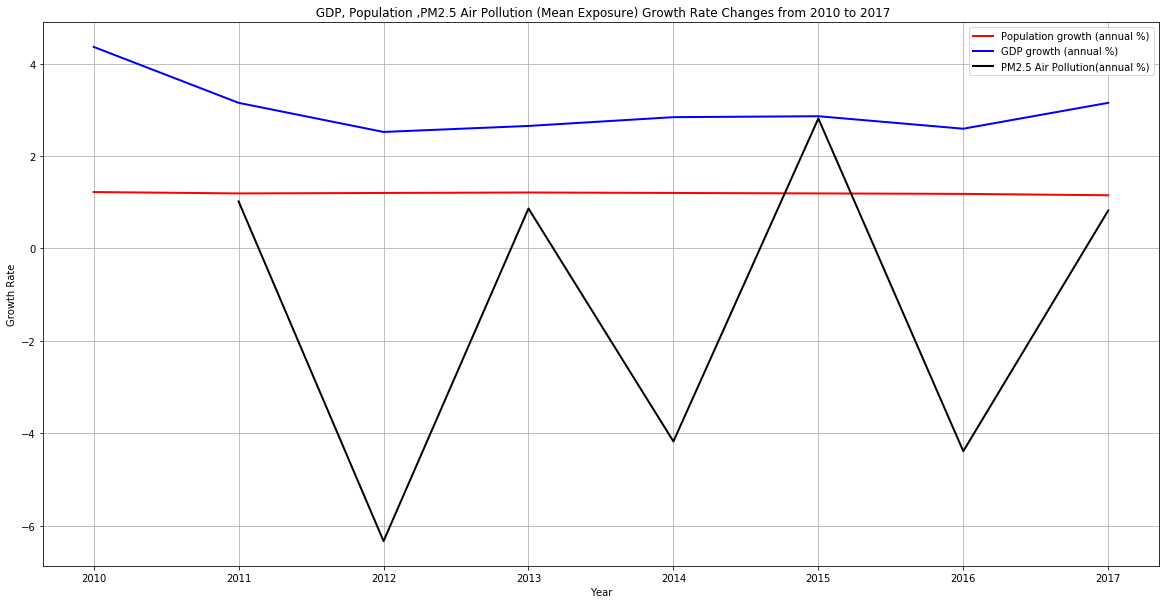

In [35]:
plt.figure(figsize=(20,10))

x_axis_GDP = world_data['GDP growth (annual %)']
x_axis_population = world_data['Population growth (annual %)']
x_axis_pm25=world_data['PM2.5 Air Pollution(annual %)']
plt.plot(x_axis_population, linewidth=2, color="red")
plt.plot(x_axis_GDP, linewidth=2, color="blue")
plt.plot(x_axis_pm25, linewidth=2, color="black")
plt.grid()
plt.legend(loc="upper right")
plt.title(" GDP, Population ,PM2.5 Air Pollution (Mean Exposure) Growth Rate Changes from 2010 to 2017")
plt.ylabel("Growth Rate")
plt.xlabel("Year")

plt.savefig("Pictures/GDP vs pm2.5. Growth Rate.png")
plt.show()

In [33]:
# x_axis_GDP = world_data['GDP growth (annual %)']
# x_axis_population = world_data['Population growth (annual %)']
# plt.plot(x_axis_population, linewidth=1, color="red")
# plt.plot(x_axis_GDP, linewidth=1, color="blue")

#### Formating Values
The values need to be formated, however, it may be better to do that once the data can be classified as a series rather than a dataframe.

Thus we'll format in the final stage before graphing.